# Analysis of Texas Air Pollution in 2016
**Name:** Suryansh Saroch 

**Date:** October 20, 2023


# Introduction
Air quality is a significant concern for public health, particularly in regions with high levels of industrial activity and urbanization. In 2016, Texas, one of the largest and most populous states in the U.S., faced notable challenges related to air pollution. Pollutants such as nitrogen dioxide (NO₂), sulfur dioxide (SO₂), carbon monoxide (CO), and ozone (O₃) are closely monitored due to their harmful effects on human health and the environment.

This report analyzes air pollution data collected across various sites in Texas throughout 2016. By examining key pollutants, we aim to identify trends in air quality, assess the levels of each pollutant, and understand the potential health risks posed to residents. This analysis will provide insights into the geographical and temporal variations of pollutant levels, highlighting areas where air quality standards may need stricter enforcement or mitigation efforts.


In [18]:
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
file_path = 'texas_2016_pollution.csv'
df = pd.read_csv(file_path)
df.head()

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,21762,48,113,69,1415 Hinton Street,Texas,Dallas,Dallas,2016-01-01,Parts per billion,...,Parts per billion,-0.070833,0.0,11,0.0,Parts per million,0.203792,0.397,22,NaN
1,21763,48,113,69,1415 Hinton Street,Texas,Dallas,Dallas,2016-01-01,Parts per billion,...,Parts per billion,-0.070833,0.0,11,0.0,Parts per million,0.210526,0.300,22,3.0
2,21764,48,113,69,1415 Hinton Street,Texas,Dallas,Dallas,2016-01-01,Parts per billion,...,Parts per billion,-0.062500,0.0,11,NaN,Parts per million,0.203792,0.397,22,NaN
3,21765,48,113,69,1415 Hinton Street,Texas,Dallas,Dallas,2016-01-01,Parts per billion,...,Parts per billion,-0.062500,0.0,11,NaN,Parts per million,0.210526,0.300,22,3.0
4,21766,48,113,69,1415 Hinton Street,Texas,Dallas,Dallas,2016-01-02,Parts per billion,...,Parts per billion,-0.013043,0.1,13,0.0,Parts per million,0.242833,0.435,19,NaN


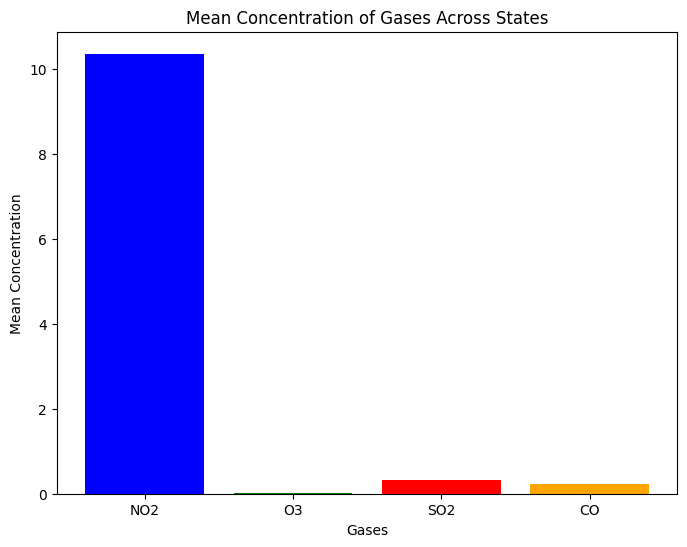

In [20]:
# Calculate the overall mean for each gas
overall_no2_mean = df['NO2 Mean'].mean()
overall_o3_mean = df['O3 Mean'].mean()
overall_so2_mean = df['SO2 Mean'].mean()
overall_co_mean = df['CO Mean'].mean()

# Prepare data for the plot
gases = ['NO2', 'O3', 'SO2', 'CO']
means = [overall_no2_mean, overall_o3_mean, overall_so2_mean, overall_co_mean]

# Plotting the bar chartS
plt.figure(figsize=(8, 6))
plt.bar(gases, means, color=['blue', 'green', 'red', 'orange'])

# Adding labels and title
plt.xlabel('Gases')
plt.ylabel('Mean Concentration')
plt.title('Mean Concentration of Gases Across States')

# Show the plot
plt.show()

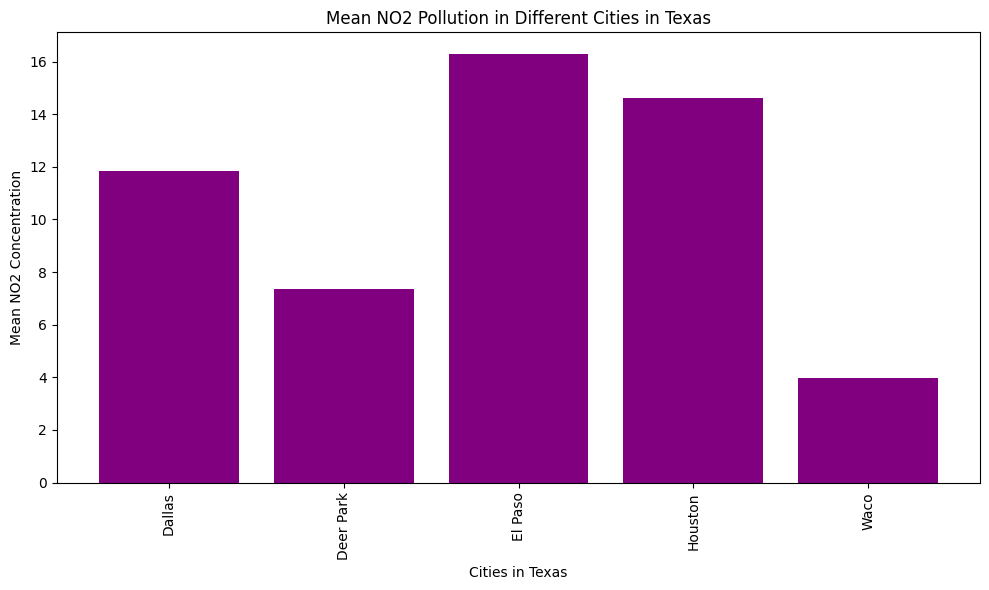

In [21]:
# Group by city and calculate the mean NO2 pollution
city_no2 = df.groupby('City')['NO2 Mean'].mean().reset_index()

# Plotting the NO2 pollution for different cities in Texas
plt.figure(figsize=(10, 6))
plt.bar(city_no2['City'], city_no2['NO2 Mean'], color='purple')

# Rotate city names for better readability
plt.xticks(rotation=90)

# Adding labels and title
plt.xlabel('Cities in Texas')
plt.ylabel('Mean NO2 Concentration')
plt.title('Mean NO2 Pollution in Different Cities in Texas')

# Show the plot
plt.tight_layout()
plt.show()

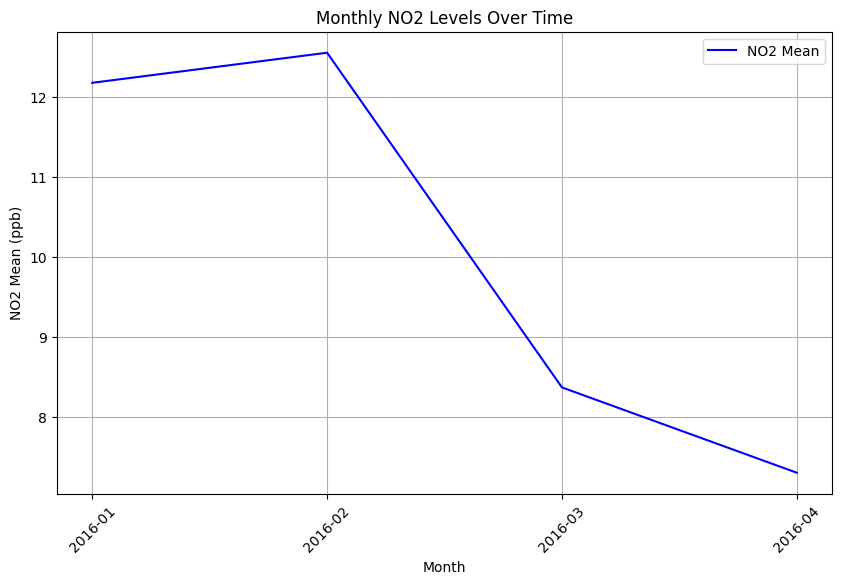

In [22]:
#Date Local is in datetime format
df['Date Local'] = pd.to_datetime(df['Date Local'], errors='coerce')

# Extract the year and month from the 'Date Local' column
df['YearMonth'] = df['Date Local'].dt.to_period('M')

# Group by YearMonth and calculate the mean of NO2 for each month
monthly_no2 = df.groupby('YearMonth')['NO2 Mean'].mean()

# Plotting the monthly NO2 Mean
plt.figure(figsize=(10,6))
plt.plot(monthly_no2.index.astype(str), monthly_no2.values, label='NO2 Mean', color='blue')

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('NO2 Mean (ppb)')
plt.title('Monthly NO2 Levels Over Time')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


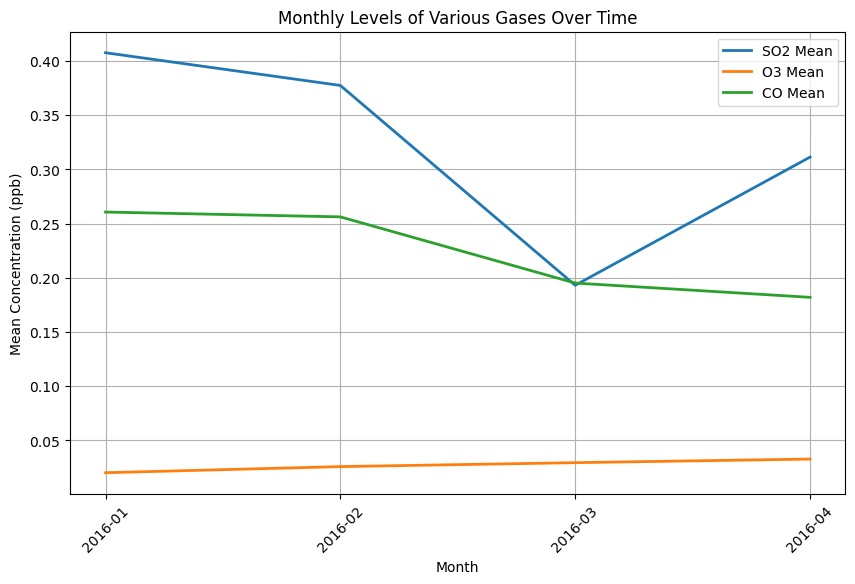

In [23]:
# List of gases to plot (excluding NO2)
gases = ['SO2 Mean', 'O3 Mean', 'CO Mean']

# Initialize the plot
plt.figure(figsize=(10,6))

# Loop through each gas and plot the monthly means
for gas in gases:
    monthly_mean = df.groupby('YearMonth')[gas].mean()
    plt.plot(monthly_mean.index.astype(str), monthly_mean.values, label=f'{gas}', linewidth=2)

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Mean Concentration (ppb)')
plt.title('Monthly Levels of Various Gases Over Time')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.legend()
plt.grid(True)

# Show the plot
plt.show()




# Conclusion

From the analysis of air pollution in Texas during 2016, it is clear that nitrogen dioxide (NO₂) stands out as the most significant pollutant, with emission levels considerably higher than those of other gases such as sulfur dioxide (SO₂), carbon monoxide (CO), and ozone (O₃). Every gas except O₃ levels were especially elevated at the beginning of the year, indicating possible seasonal or industrial factors contributing to higher emissions during this period.

Geographically, El Paso and Houston emerged as the cities with the highest NO₂ emissions, suggesting that these areas are particularly vulnerable to air quality concerns. These findings show the need for targeted emission control measures and ongoing monitoring to reduce NO₂ pollution and mitigate its potential health and environmental impacts in these regions.






